# 앙상블
- 여러 개의 예측모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측모형을 만드는 방법으로 다중 모델 조합, 분류기 조합이 있다.
<br>

> 기법

1. 배깅(Bagging)
    - 주어진 자료에서 여러 개의 `붓스트랩(bootstrap)`을 생성하고 각 붓스트랩 자료에 예측모형을 만든 후 결합하여 최종 예측모형을 만드는 방법이다.
    - 붓스트랩은 주어진 자료에서 동일한 크기의 표본을 `랜덤 복원추출`로 뽑은 자료를 의미한다.
    - 최적의 의사결정나무를 구축할 때 가장 어려운 부분이 가지치기(pruning)이지만 배깅에서는 **가지치기를 하지 않고** 최대로 성장한 의사결정나무들을 활용한다.
    - 훈련자료의 모집단의 분포를 모르기 때문에 실제 문제에서는 평균예측모형을 구할 수 없다. 이러한 문제를 해결하기 위해 **훈련자료를 모집단으로 생각하고 평균예측모형을 구하여 분산을 줄이고 예측력을 향상**시킬 수 있다.

<br>

2. 부스팅(Boosting)
    - 예측력이 약한 모형들을 결합하여 강한 예측모형을 만드는 방법이다.
    - 부스트 방법 중 `Adaboost`는 이진분류 문제에서 랜덤 분류기보다 조금 더 좋은 분류기 n개에 각각 가중치를 설정하고 n개의 분류기를 결합하여 최종 분류기를 만드는 방법을 제안하였다. (가중치의 합은 1)
    - 훈련오차를 빠르고 쉽게 줄일 수 있다.
    - Adaboost의 성능이 배깅보다 뛰어난 경우가 많다.

<br>

3. 랜덤포레스트(Random Forest)
    - 의사결정나무의 특징인 분산이 크다는 점을 고려하여 배깅과 부스팅보다 더 많은 **무작위성**을 주어 **약한 학습기들을 생성한 후 이를 선형결헙하여 최종 학습기를 만드는 방법**이다.
    - 배깅 방식이 사용되며 배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어 **보팅(Voting)**으로 최종 결정하는 알고리즘이다
    - 변수 제거 없이 실행되므로 정확도 측면에서 좋은 성과를 보인다.
    - 최종 결과에 대한 해석이 어렵다는 단점이 있으나 예측력이 매우 높은 것으로 알려져있다.

In [ ]:
pip install graphviz

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pip install graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [36]:
from sklearn.datasets import load_breast_cancer, load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, f1_score

## 배깅(Bagging)

In [5]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])

In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [9]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=iris.feature_names)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=94)

In [15]:
model = DecisionTreeClassifier()
bagging = BaggingClassifier(model)
bagging.fit(X_train, y_train)

predict = bagging.predict(X_test)

print("베깅 모델 학습 데이터 점수 : {}".format(bagging.score(X_train, y_train)))
print("배깅 모델 평가 데이터 점수 : {}".format(bagging.score(X_test, y_test)))

베깅 모델 학습 데이터 점수 : 1.0
배깅 모델 평가 데이터 점수 : 0.9666666666666667


## 보팅(Voting)

In [31]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
# 로지스틱 모델과 트리 모델 생성
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

# 위 두 모델을 결합하여 보팅 모델 생성
vo_clf = VotingClassifier(estimators=[('LR', model1), ('KNN',model2)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# 보팅모델의 스코어 파악
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting accuracy : {0:.4f}'.format(accuracy_score(y_test, pred)))
print('Voting F1-score : {0:.4f}'.format(f1_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

classifier = [model1, model2]

# 비교를 위해 각 모델 별 스코어 출력 
for classifier in classifier :
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  
  print('{0} accurcy : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
  print('{0} F1-score : {1:.4f}'.format(class_name, f1_score(y_test, pred)))
  print(confusion_matrix(y_test, pred))

Voting accuracy : 0.9474
Voting F1-score : 0.9615
[[33  4]
 [ 2 75]]
LogisticRegression accurcy : 0.9386
LogisticRegression F1-score : 0.9554
[[32  5]
 [ 2 75]]
DecisionTreeClassifier accurcy : 0.9386
DecisionTreeClassifier F1-score : 0.9548
[[33  4]
 [ 3 74]]


## 부스팅(Boosting)

### GradientBoosting
부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습 - 예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가면서 학습하는 방식이다. 그 중에서 GBM은 가중치 업데이트를 **경사 하강법**을 이용한다. 정의된 손실 함수를 기준으로 오차를 계산하고 트리 기반의 약한 학습기를 만들어 오차를 줄일 수 있도록 가중치를 갱신하여 학습을 진행한다.

In [37]:
df = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)
df['target'] = load_breast_cancer().target

In [21]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
X = df.iloc[:, :-1]
y = np.array(df['target'])

In [39]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=94)

In [25]:
gbc = GradientBoostingClassifier(random_state=94)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=94)

In [26]:
pred = gbc.predict(X_test)

In [27]:
acc = accuracy_score(y_test, pred)
acc

0.9912280701754386

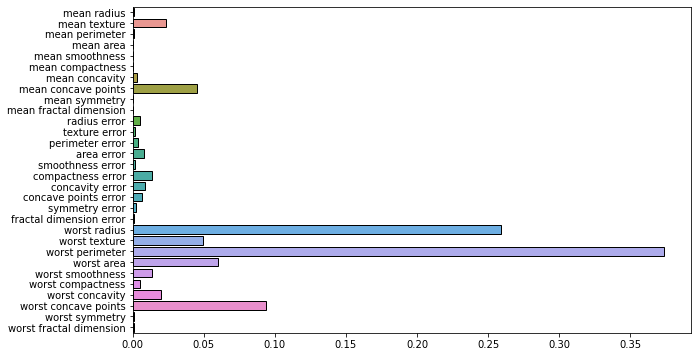

In [28]:
plt.figure(figsize = (10, 6))
sns.barplot(y=X.columns.tolist(), x=gbc.feature_importances_, edgecolor=(0, 0, 0))
plt.show()

### AdaBoot

In [18]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

predict = model.predict(X_test)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))
print("MSE : {}".format(mean_squared_error(y_test, predict)))

학습 데이터 점수 : 0.9876674584462998
평가 데이터 점수 : 0.9375950319207793
MSE : 0.037165625433847015


## XGBoost
- `early_stopping_rounds=100` 은 평가 지표가 어느 지점에서 100번째까지 향상되지 않는다면 조기 종료하겠다는 옵션이다. 너무 급격하게 줄이면 성능향상의 여지가 있는데 조기종료되어 모델의 성능이 저하될 수 있으므로 적절한 수를 선택해야 한다.
- `eval_metric='logloss'` 는 평가지표로 logloss를 사용하겠다는 옵션이다.
- `eval_set=[(X_test, y_test)]`는 평가를 할 데이터셋을 명시한다.
- `verbose`는 각 과정을 보여주느냐 마느냐를 결정하는 옵션이다. 기본값은 0으로 각 과정을 보여주지 않는것으로 되어있다.

In [41]:
model = XGBClassifier()
model.fit(X_train, y_train)

predict = model.predict(X_test)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.9912280701754386


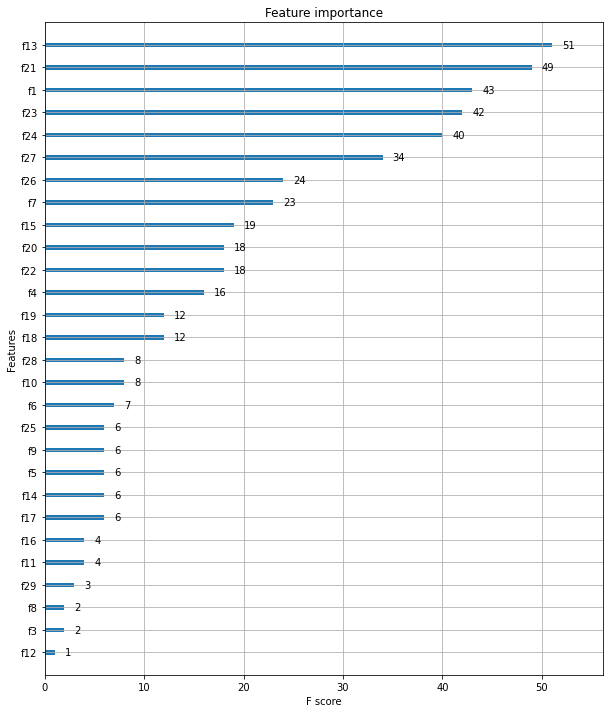

In [43]:
# xgboost 안의 plot_importance를 활용해서 변수의 중요도를 시각화
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)

## LightGBM
- 다른 부스팅 방식과는 다르게 리프중심트리분할을 사용한다.
- 카테고리형 피처의 자동변환과 최적 분할한다. (원-핫인코딩 사용하지 않아도 최적으로 변환하고 이에 따른 노드 분할 수행)
- 일반적 부스팅계열 튜닝 : n_estimator, learning_rate
- num_leaves의 개수를 중심으로 min_child_samples, max_depth를 함께 조정하며 모델의 복잡도를 줄인다.

In [44]:
model = LGBMClassifier()
model.fit(X_train, y_train)

predict = model.predict(X_test)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 1.0
평가 데이터 점수 : 1.0


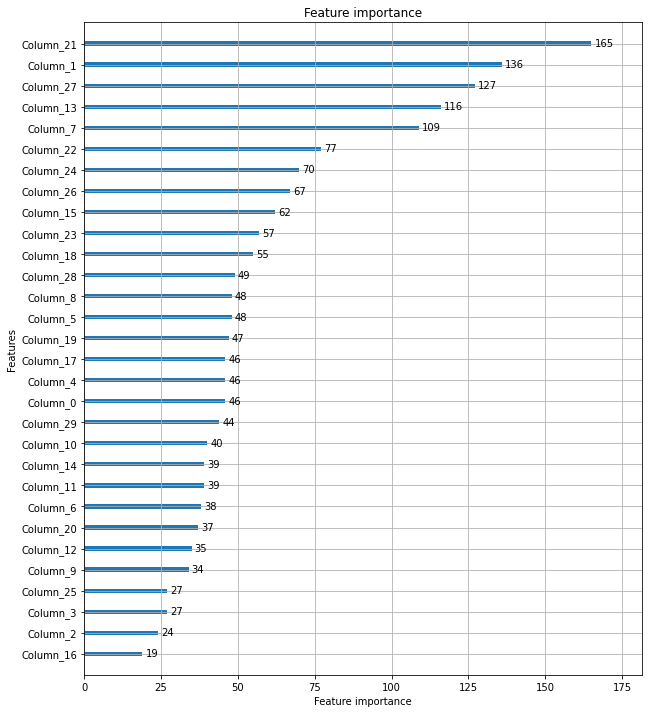

In [45]:
# xgboost 안의 plot_importance를 활용해서 변수의 중요도를 시각화
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)